# NAME: SHIVAM YADAV
### "TASK 1"
### PREDICTION USING SUPERVISED ML (LEVEL-BEGINNER)

# # PREDICT THE PERCENTAGE OF MARKS OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS.

# LOADING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
print('Rows     :',df.shape[0])
print('colums     :',df.shape[1])
print('\nfeatures :\n   :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values : \n',df.nunique())


Rows     : 25
colums     : 2

features :
   : ['Hours', 'Scores']

Missing values    : 0

Unique values : 
 Hours     23
Scores    23
dtype: int64


In [7]:
df['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [8]:
df['Scores'].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

# EDA
# UNIVARIATE ANALYSIS
# DISTRIBUTION PLOT FOR 'HOURS'

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


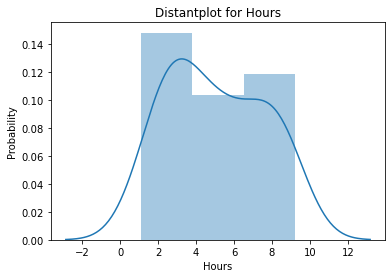

In [9]:
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distantplot for Hours')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


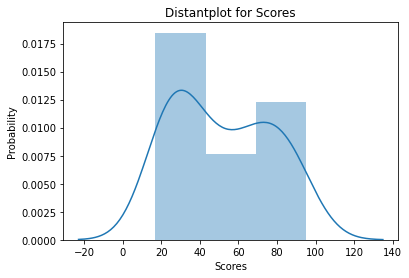

In [10]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distantplot for Scores')
plt.show()

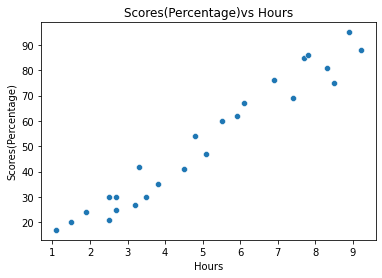

In [11]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(Percentage)')
plt.title('Scores(Percentage)vs Hours')
plt.show()

# # from above scatter plot, it is observed that scores are highly postively correlated with number of hours spent in studying.As the number of hours increases so shall the marls increases.


# MULTIVARIATE ANALYSIS

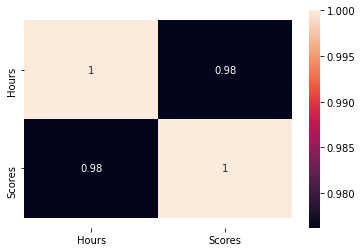

In [12]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.10,top-0.10)
plt.show()

# FROM THE HEATMAP, IT IS OBSERVED THAT THE CORRELATION IS HIGHLY POSITIVE AND THE VALUE OF CORRELATION BETWEEN THE HOURS OF STUDY AND SCORES IS 0.98.

# **Preparing the data**

In [13]:
x=df[['Hours']]
y=df[['Scores']]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest,=train_test_split(x,y, test_size=0.2, random_state=0)
xtrain.shape , xtest.shape

((20, 1), (5, 1))

# using Linear Regression for building the model and prediction

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin=LinearRegression(fit_intercept=True)

In [17]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lin.intercept_

array([2.01816004])

In [19]:
lin.coef_

array([[9.91065648]])

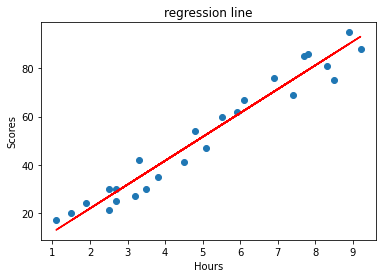

In [20]:
plt.scatter(x,y)
plt.plot(x,lin.predict(x),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('regression line')
plt.show()

# Predicting for Ytest

In [21]:
ypred = lin.predict(xtest)
print(ypred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


# FLATTEN()
# Function is used to get a copy of an given array collapsed into one dimension.

# it is used for converting nD array into 1D array

In [22]:
ypred=ypred.flatten()

In [23]:
dataset = pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':ypred})

In [24]:
print(dataset)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [25]:
hours =np.array(9.00).reshape(1,-1)
result= lin.predict(hours)
print('if you study :',np.asscalar(hours),"Hours")
print('Your score will be (%):',np.asscalar(result),"\nHappy Learning")

if you study : 9.0 Hours
Your score will be (%): 91.21406836721482 
Happy Learning


<ipython-input-25-062589fe50be>:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('if you study :',np.asscalar(hours),"Hours")
<ipython-input-25-062589fe50be>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Your score will be (%):',np.asscalar(result),"\nHappy Learning")
